# CGMF Summary File Analyzer

<font size=4em color="darkblue">Austin Carter<sup>a,b</sup>, Patrick Talou<sup>a</sup>, Ionel Stetcu<sup>a</sup></font> <br />
<sup>a</sup>Los Alamos National Laboratory <br />
<sup>b</sup>University of Michigan<br />

<a href="mailto:austinlc@umich.edu">austinlc@umich.edu</a>

In [1]:
import numpy as np
import scipy as sp
import os
from statistics import *
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import sympy as sym
from sympy.interactive import printing
printing.init_printing(use_latex = 'mathjax')
from IPython.display import display, Math, Latex
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
# Define summary file path and modify if necessary
summary_file_name = "Summary.txt"
summary_file_path = os.path.join(os.getcwd(),summary_file_name)

In [3]:
#-- YOU COULD SIMPLIFY THIS BY WRITING: 
#-- "In Summary2/3.txt", I added "#" for the first few comment lines; numpy ignores those lines by default 
nevents, TXE, TXEu, TKE, TKEu, J, Ju, nn, nnm2, nnm3, ng, ngm2, ngm3, Encm, Encmu, Egcm, Egcmu, Enlab, Enlabu, Eglab, Eglabu = np.loadtxt("Summary.txt",unpack=True, usecols=range(1,22))

In [4]:
def shorten(s, subs):
    i = s.index(subs)
    s = s[i+1:]
    i = s.index(subs)
    return s[:i]

def plot_and_report(x_vars, y_vars, x_labels, y_labels, xfig = 16, yfig = 18):
    
    #PLOT
    
    fig = plt.figure(figsize=(xfig,yfig))
    for i in range(len(y_vars)):  #rows
        for j in range(len(x_vars)):   #columns
            plt.subplot(len(y_vars),len(x_vars),len(x_vars)*i+j+1)
            plt.plot(x_vars[j],y_vars[i] , 'ko')
            #bottom row, add xlabels
            if i == len(y_vars) - 1:
                plt.xlabel(x_labels[j])
            
            #left column, add ylabels
            if j == 0:
                plt.ylabel(y_labels[i])
                
    
                                                                                               
    # REPORT STATISTICS
    print("Pearson Correlation Coefficients:")
    for i in range(len(y_vars)):
        for j in range(len(x_vars)):
            #ONLY IN IPYTHON NOTEBOOK  
            reportstr = r"\begin{align}" + shorten(x_labels[j], "$") + '&&' + ' and ' + '&&' + shorten(y_labels[i], "$")+ ":"+ '&&'  + str(np.corrcoef(np.array(x_vars[j]).astype(float),np.array(y_vars[i]).astype(float))[0][1]) + '\end{align}'
            display(Math(reportstr))
                

Pearson Correlation Coefficients:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[ -0.08565222  19.71604919]


<Container object of 3 artists>

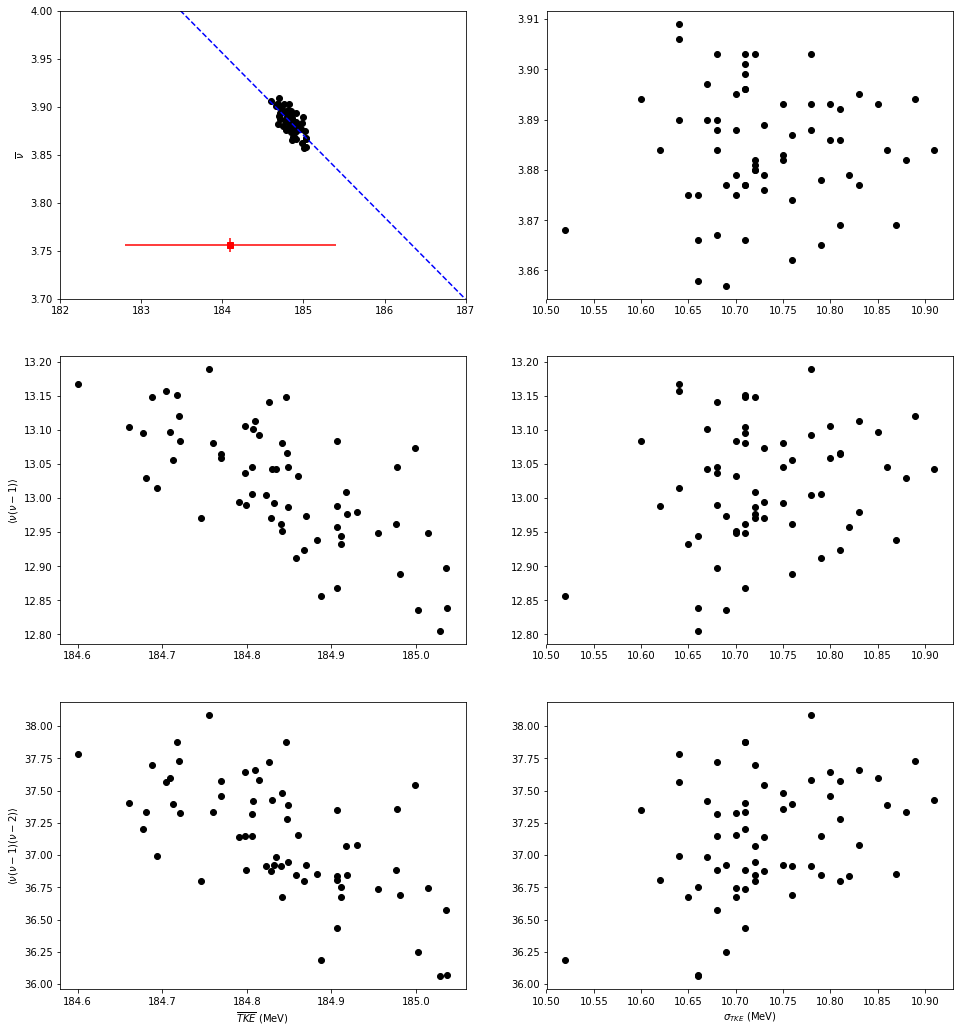

In [5]:
x = [TKE,TKEu]
y = [nn, nnm2, nnm3]
xlabels = [r"$\overline{TKE}$ (MeV)", r"$\sigma_{TKE}$ (MeV)"]
ylabels = [r'$\overline{\nu}$', r'$\left \langle \nu(\nu-1) \right \rangle$', r'$\left \langle \nu(\nu-1)(\nu-2) \right \rangle$']

plot_and_report(x,y,xlabels, ylabels)

plt.subplot(3,2,1) 
plt.xlim(182.0,187.)
plt.ylim(3.7,4.00)
fit = np.polyfit(TKE,nn,1)
print (fit)
fitfun = np.poly1d(fit)
x=np.linspace(182,188,61)
plt.plot(x,fitfun(x),'b--')
plt.errorbar(184.1,3.756,xerr=1.3,yerr=0.002*3.756,fmt='rs') #-- experimental point

Pearson Correlation Coefficients:


<IPython.core.display.Math object>

[ -0.08565222  19.71604919]


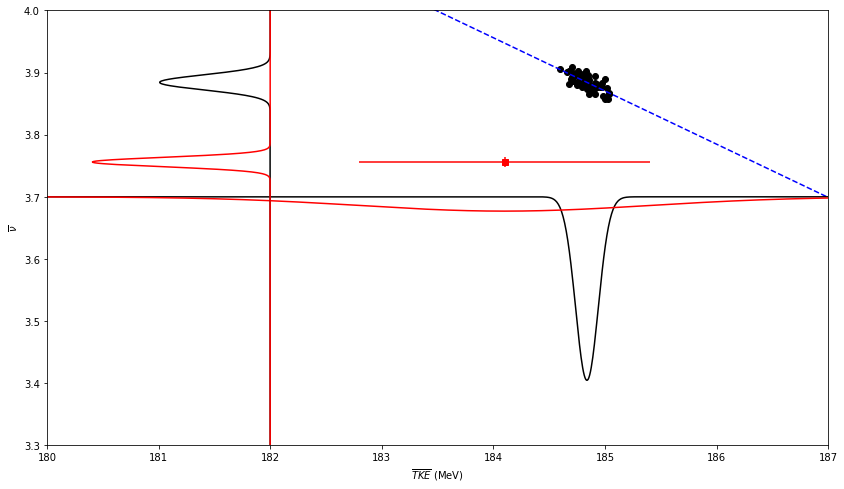

In [6]:
# Special plot that includes the Gaussians on opposite side of the axis

x = [TKE]
y = [nn]
xlabels = [r"$\overline{TKE}$ (MeV)"]
ylabels = [r'$\overline{\nu}$']
xfig = 14
yfig = 8

plot_and_report(x,y,xlabels, ylabels, xfig, yfig)

plt.subplot(1,1,1) 
plt.xlim(180.0,187.)
plt.ylim(3.3,4.00)
fit = np.polyfit(TKE,nn,1)
print (fit)
fitfun = np.poly1d(fit)
x=np.linspace(180,188,61)
plt.plot(x,fitfun(x),'b--')
plt.errorbar(184.1,3.756,xerr=1.3,yerr=0.002*3.756,fmt='rs') #-- experimental point

# Gaussian curves

mean_TKE = mean(TKE)
sig_TKE  = stdev(TKE)
x = np.linspace(180.,187.,1000)
plt.plot(x,-0.075*mlab.normpdf(x, mean_TKE, sig_TKE)+3.7, 'k')

mean_TKE_exp = 184.1
sig_TKE_exp  = 1.3
plt.plot(x,-0.075*mlab.normpdf(x, mean_TKE_exp, sig_TKE_exp)+3.7, 'r')

mean_nu  = mean(nn)
sig_nu   = stdev(nn)
y        = np.linspace(3.3,4.,1000)
plt.plot(-0.03*mlab.normpdf(y, mean_nu, sig_nu)+182, y, 'k')

mean_nu_exp  = 3.756
sig_nu_exp   = 0.002*3.756
y        = np.linspace(3.3,4.,1000)
plt.plot(-0.03*mlab.normpdf(y, mean_nu_exp, sig_nu_exp)+182, y, 'r')

[ -0.08565222  19.71604919]


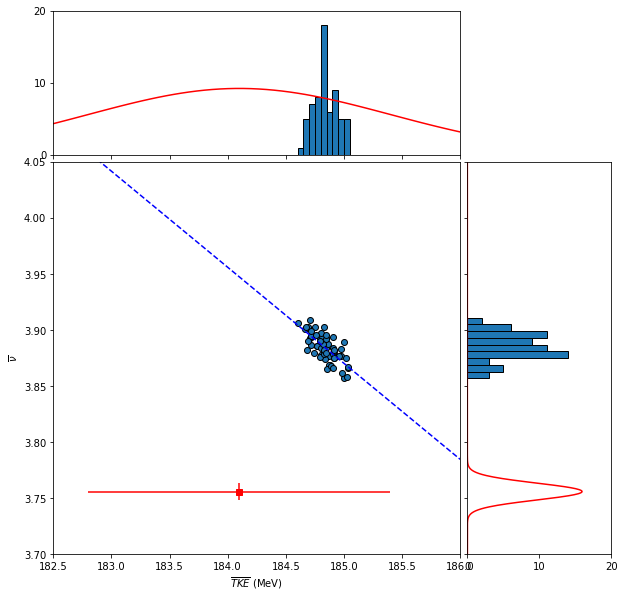

In [40]:
# Special Axis-Sharing Plot

fig, axScatter = plt.subplots(figsize=(10,10))

# the scatter plot:
sz = 8
axScatter.scatter(TKE, nn, edgecolor='k')
axScatter.set_aspect('auto')
axScatter.set_xlabel(r"$\overline{TKE}$ (MeV)")
axScatter.set_ylabel(r'$\overline{\nu}$')

fit = np.polyfit(TKE,nn,1)
print (fit)
fitfun = np.poly1d(fit)
x=np.linspace(182,186,61)
axScatter.plot(x,fitfun(x),'b--')
axScatter.errorbar(184.1,3.756,xerr=1.3,yerr=0.002*3.756,fmt='rs') #-- experimental point


# create new axes on the right and on the top of the current axes
# The first argument of the new_vertical(new_horizontal) method is
# the height (width) of the axes to be created in inches.
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 2., pad=0.1, sharex=axScatter)
axHisty = divider.append_axes("right", 2., pad=0.1, sharey=axScatter)

# make some labels invisible
plt.setp(axHistx.get_xticklabels() + axHisty.get_yticklabels(),
         visible=False)

# now determine nice limits by hand:
xbinwidth = 0.05
ybinwidth = 6E-3

xbins = np.arange(np.min(TKE) - xbinwidth, np.max(TKE) + xbinwidth, xbinwidth)
ybins = np.arange(np.min(nn) - ybinwidth, np.max(nn) + ybinwidth, ybinwidth)

axHistx.hist(TKE, bins=xbins,edgecolor = 'k')
axHisty.hist(nn, bins=ybins, orientation='horizontal',edgecolor = 'k')

mean_TKE_exp = 184.1
sig_TKE_exp  = 1.3
axHistx.plot(x,30*mlab.normpdf(x, mean_TKE_exp, sig_TKE_exp), 'r')

mean_nu_exp  = 3.756
sig_nu_exp   = 0.002*3.756
y        = np.linspace(3.6,4.05,1000)
plt.plot(0.3*mlab.normpdf(y, mean_nu_exp, sig_nu_exp), y, 'r')

# the xaxis of axHistx and yaxis of axHisty are shared with axScatter,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

#axHistx.axis["bottom"].major_ticklabels.set_visible(False)
for tl in axHistx.get_xticklabels():
    tl.set_visible(False)
axHistx.set_yticks([0, 10, 20])

#axHisty.axis["left"].major_ticklabels.set_visible(False)
for tl in axHisty.get_yticklabels():
    tl.set_visible(False)
axHisty.set_xticks([0, 10, 20])

axScatter.set_ylim([3.7, 4.05])
axScatter.set_xlim([182.5, 186.])

plt.draw()
plt.show()

[3.763512, 3.763512]


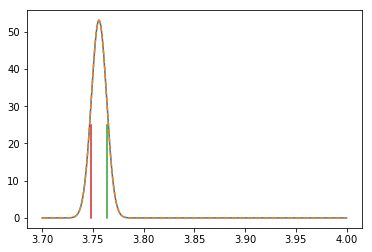

In [38]:
plt.subplot(1,1,1)
x = np.linspace(3.7,4,1000)
plt.plot(x,mlab.normpdf(x, 3.756, 0.002*3.756))
def gauss(x,mu,sig):
    y=[]
    for i in range(len(x)):
        y.append(1/sig/np.sqrt(2*np.pi)*np.exp(-((x[i]-mu)/sig)**2/2))
    return y

print([1.002*3.756, 1.002*3.756])
plt.plot(x,gauss(x, 3.756, 0.002*3.756),'--')
plt.plot([1.002*3.756, 1.002*3.756], [0., 25.])
plt.plot([0.998*3.756, 0.998*3.756], [0., 25.])

Pearson Correlation Coefficients:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

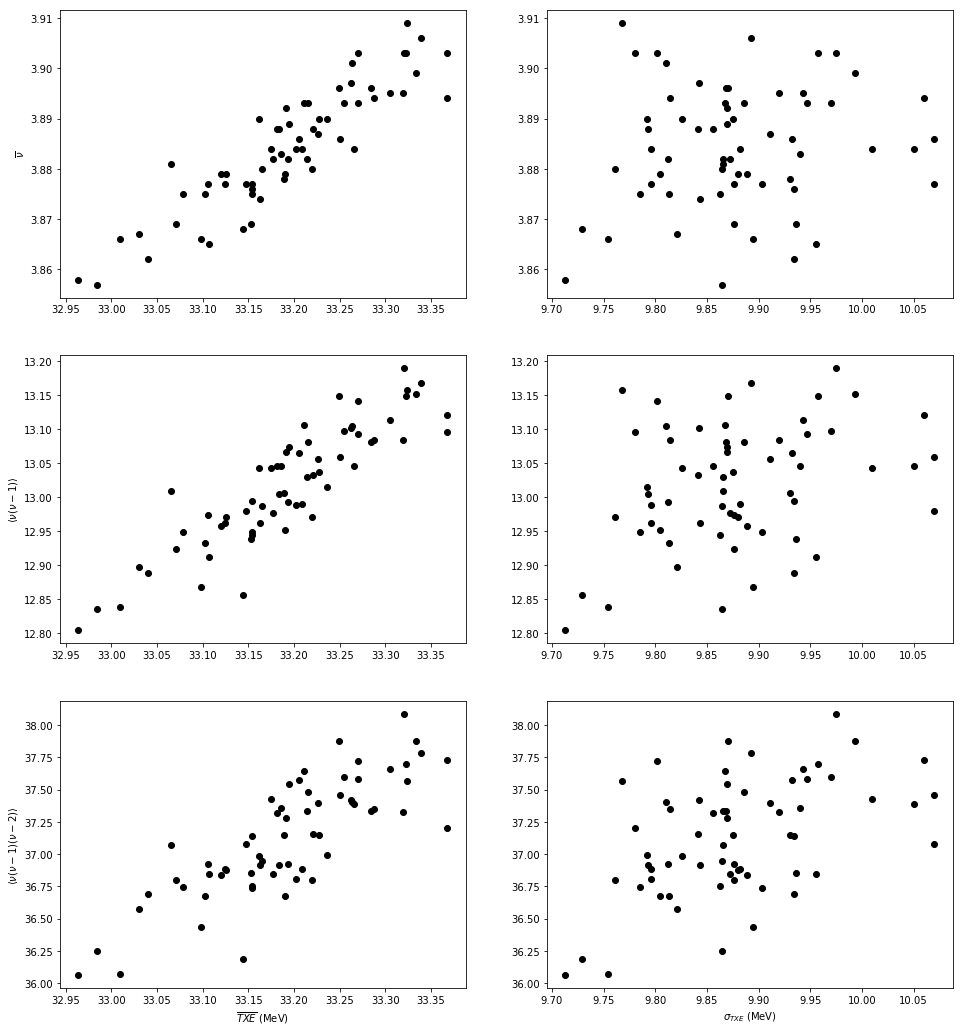

In [8]:
# Plot nn vs txe and moments

x = [TXE,TXEu]
y = [nn, nnm2, nnm3]
xlabels = [r"$\overline{TXE}$ (MeV)", r"$\sigma_{TXE}$ (MeV)"]
ylabels = [r'$\overline{\nu}$', r'$\left \langle \nu(\nu-1) \right \rangle$', r'$\left \langle \nu(\nu-1)(\nu-2) \right \rangle$']

plot_and_report(x,y,xlabels, ylabels)

Pearson Correlation Coefficients:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

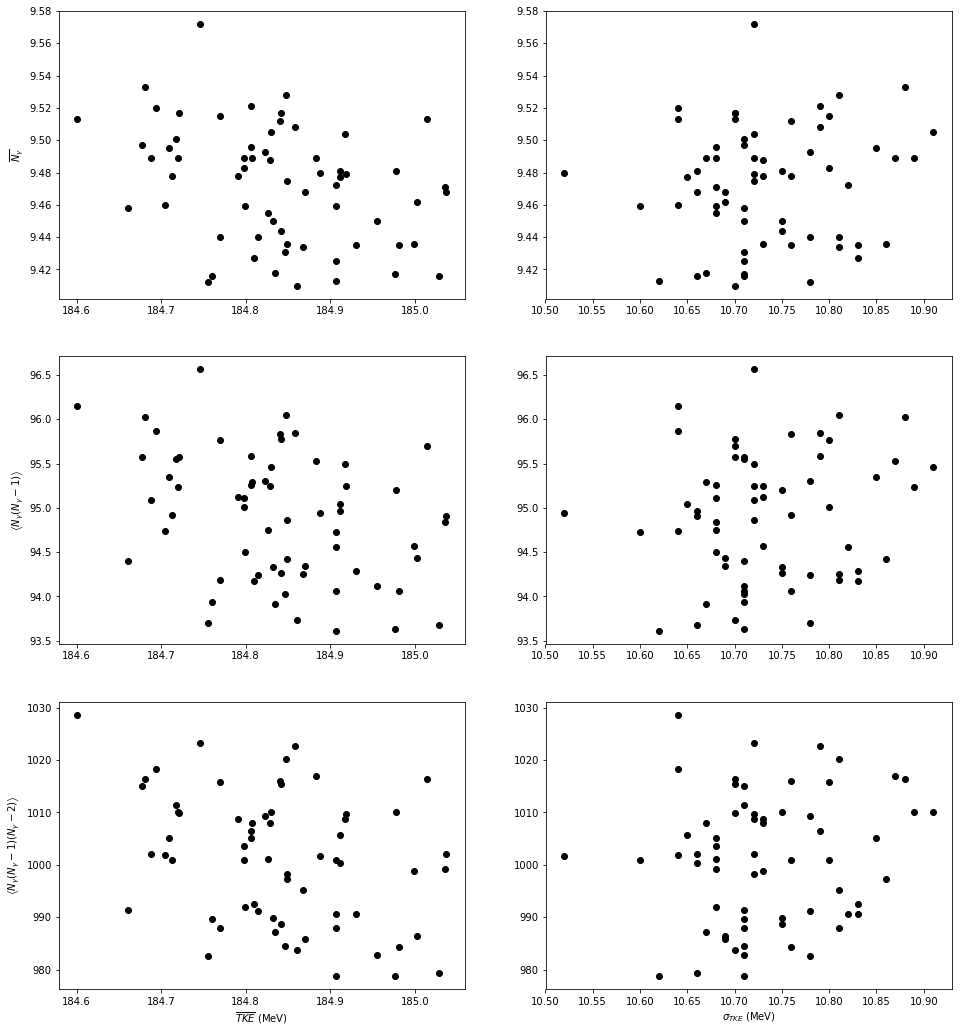

In [9]:
# Plot ng vs tke and moments

x = [TKE,TKEu]
y = [ng, ngm2, ngm3]
xlabels = [r"$\overline{TKE}$ (MeV)", r"$\sigma_{TKE}$ (MeV)"]
ylabels = [r'$\overline{N_{\gamma}}$', r'$\left \langle N_{\gamma}(N_{\gamma}-1) \right \rangle$', r'$\left \langle N_{\gamma}(N_{\gamma}-1)(N_{\gamma}-2) \right \rangle$']

plot_and_report(x,y,xlabels, ylabels)

Pearson Correlation Coefficients:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

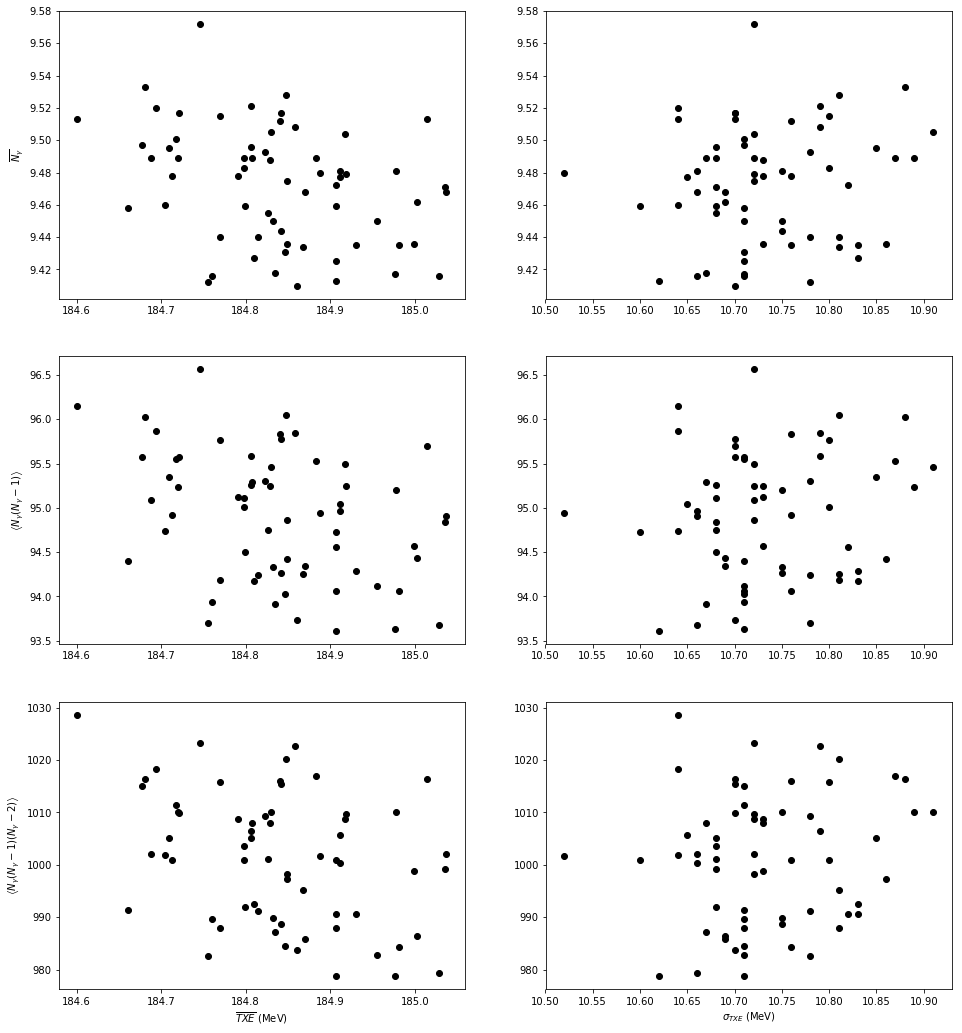

In [10]:
# Plot ng vs txe and moments

x = [TKE,TKEu]
y = [ng, ngm2, ngm3]
xlabels = [r"$\overline{TXE}$ (MeV)", r"$\sigma_{TXE}$ (MeV)"]
ylabels = [r'$\overline{N_{\gamma}}$', r'$\left \langle N_{\gamma}(N_{\gamma}-1) \right \rangle$', r'$\left \langle N_{\gamma}(N_{\gamma}-1)(N_{\gamma}-2) \right \rangle$']

plot_and_report(x,y,xlabels, ylabels)

Pearson Correlation Coefficients:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

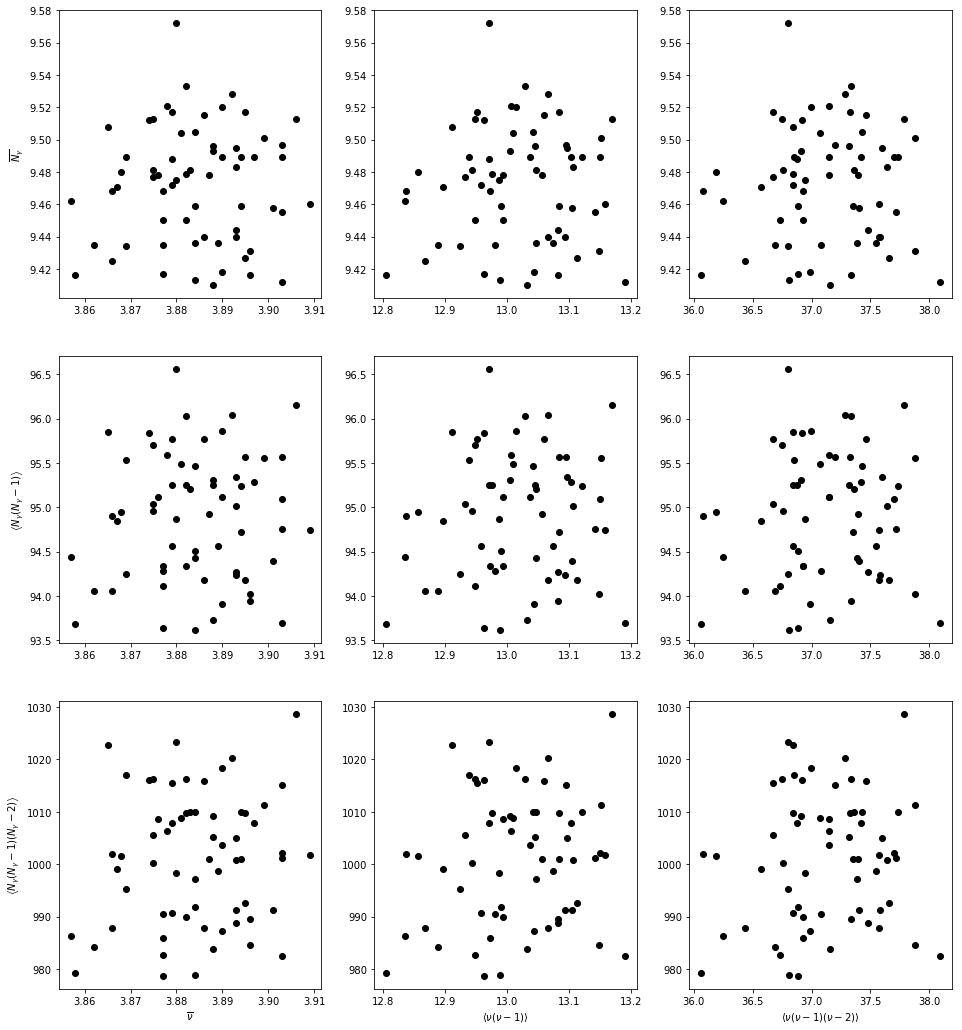

In [11]:
# Plot ng vs tke and moments

x = [nn,nnm2, nnm3]
y = [ng, ngm2, ngm3]
xlabels = [r'$\overline{\nu}$', r'$\left \langle \nu(\nu-1) \right \rangle$', r'$\left \langle \nu(\nu-1)(\nu-2) \right \rangle$']
ylabels = [r'$\overline{N_{\gamma}}$', r'$\left \langle N_{\gamma}(N_{\gamma}-1) \right \rangle$', r'$\left \langle N_{\gamma}(N_{\gamma}-1)(N_{\gamma}-2) \right \rangle$']

plot_and_report(x,y,xlabels, ylabels)

Pearson Correlation Coefficients:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

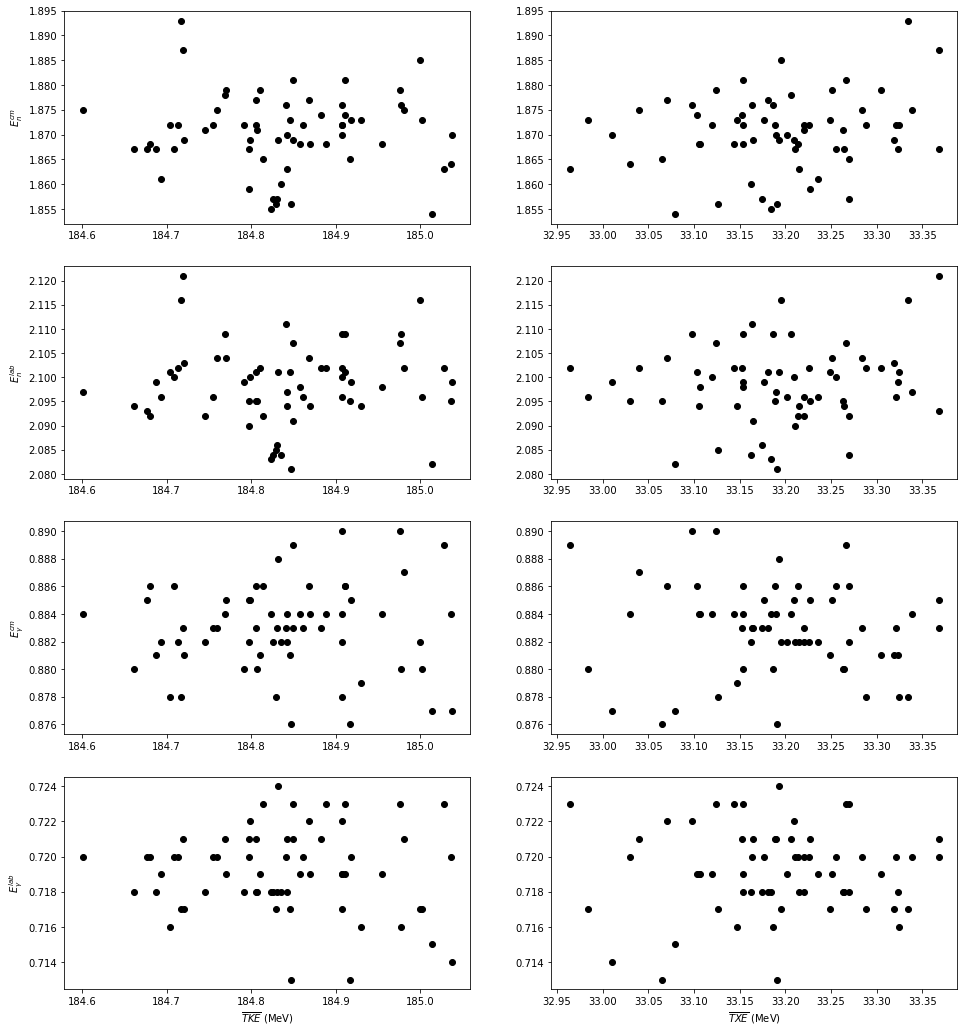

In [12]:
# Plot ng vs tke and moments

x = [TKE, TXE]
y = [Encm, Enlab, Egcm, Eglab]
xlabels = [r"$\overline{TKE}$ (MeV)",r"$\overline{TXE}$ (MeV)"]
ylabels = [r'$E_{n}^{cm}$', r'$E_{n}^{lab}$', r'$E_{\gamma}^{cm}$',  r'$E_{\gamma}^{lab}$']

plot_and_report(x,y,xlabels, ylabels)